# 1. Import libraries and dataset:

In [1]:
import tensorflow as tf

In [2]:
import zipfile

In [3]:
location = 'suicide_tweets.zip'
zip_ref = zipfile.ZipFile(location, 'r')
zip_ref.extractall()
zip_ref.close()

# 2. Explore the dataset:

**1. VIEWING RANDOM TWEETS FROM THE DATASET:**

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('suicide_dataset.csv')
df.head(10)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
5,"@ValenValdez Oh, that's good to hear. But is i...",Not Suicide post
6,@mcm180 u've got a list for fellow #hotties? Y...,Not Suicide post
7,@jakepaul @jamescharles @LoganPaul Just becaus...,Potential Suicide post
8,time for some warsaw beer garden chilling,Not Suicide post
9,I hate my life lmao I hope I die soon or sumn ...,Potential Suicide post


In [7]:
import random
index = random.randrange(0, df.shape[0])
print("Tweet is:\n", df.iloc[index]['Tweet'])
print("Sentiment is:\n", df.iloc[index]['Suicide'])

Tweet is:
 Mmm mummy's culinary skills has been improving. Smells so good! i'm loving home cooked food!
Sentiment is:
 Not Suicide post


**2. TOTAL NUMBER OF TWEETS IN THE DATASET:**

In [8]:
num_tweets = df.shape[0]
print("Total number of tweets in the dataset: ", num_tweets)

Total number of tweets in the dataset:  1787


**3. TOTAL TWEETS OF EACH CLASS:**

In [9]:
not_suicide = df[df['Suicide']=='Not Suicide post']['Suicide'].count()

In [10]:
potential_suicide = df[df['Suicide']=='Potential Suicide post ']['Suicide'].count()

In [11]:
print("Number of not suicide tweets: ", not_suicide)
print("Number of potential suicide tweets: ", potential_suicide)

Number of not suicide tweets:  1127
Number of potential suicide tweets:  660


**4. VISUALIZATION OF STATS OF TWEETS:**

**I. Bar Graph:**

In [12]:
import matplotlib.pyplot as plt

In [13]:
x = ['not suicide post', 'potential suicide post', ]
y = [not_suicide, potential_suicide]

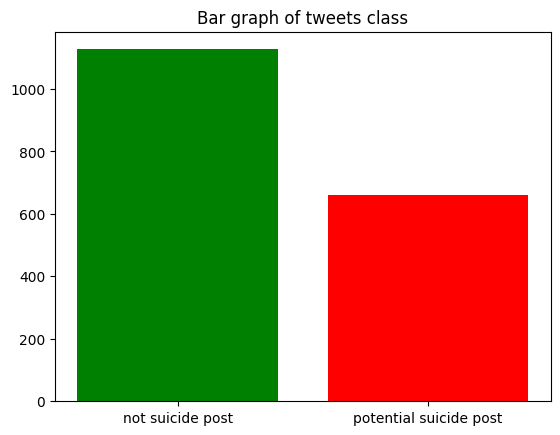

In [14]:
plt.bar(x, y, color=['g', 'r'])
plt.title('Bar graph of tweets class')
plt.show()

**II. Pie Chart:**

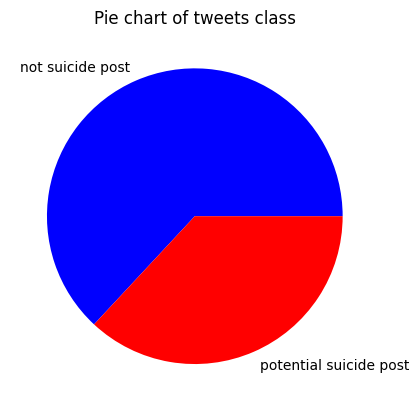

In [15]:
plt.pie(y, labels=x, colors=['b', 'r'])
plt.title("Pie chart of tweets class")
plt.show()

**5. ONE HOT ENCODING:**

In [16]:
df['Suicide'] = df['Suicide'].replace({'Not Suicide post': 0, 'Potential Suicide post ': 1})

In [17]:
df.head(10)

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0
5,"@ValenValdez Oh, that's good to hear. But is i...",0
6,@mcm180 u've got a list for fellow #hotties? Y...,0
7,@jakepaul @jamescharles @LoganPaul Just becaus...,1
8,time for some warsaw beer garden chilling,0
9,I hate my life lmao I hope I die soon or sumn ...,1


In [18]:
print("Not Suicide post: ", df[df['Suicide']==0]['Suicide'].count())

Not Suicide post:  1127


In [19]:
print("Potential Suicide post:", df[df['Suicide']==1]['Suicide'].count())

Potential Suicide post: 660


# 3. Preprocessing text:

**1. DATAFRAME TO LIST DATATYPE:**

**I. Conversion of Tweet column of dataframe to list:** 

In [20]:
tweets = df['Tweet'].astype('str')
tweets = tweets.tolist()

In [21]:
print("Type is: ", type(tweets))

Type is:  <class 'list'>


**II. Conversion of Suicide column of dataframe to list:** 

In [22]:
labels = df['Suicide'].tolist()

In [23]:
print("Type is: ", type(labels))

Type is:  <class 'list'>


**III. Conversion of Suicide column to array:**

In [24]:
import numpy as np
labels = np.array(labels)

**IV. Random tweets from the list:**

In [39]:
rand_index = random.randrange(0, len(tweets))

In [40]:
print("Tweet is: \n", tweets[rand_index])

Tweet is: 
 trying to figure out how this works!


In [41]:
if labels[rand_index]==0:
    print("Not Suicide(0)")
else:
    print("Potential Suicide(1)")

Not Suicide(0)


**2. SPLITTING THE ENTIRE DATASET INTO TRAIN AND TEST DATASETS:**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_tweet, test_tweet, train_label, test_label = train_test_split(tweets, labels, random_state=42, test_size=0.2)

In [44]:
train_tweet[1]

"@elleeseymour I didn't realise you were trustee. There are loads of you aren't there? Find RASE structure quite confusing!"

In [45]:
train_label[1]

0

**3. PREPROCESSING THE TEXTUAL DATA INTO NUMERICAL FORMAT:**

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**I. Setting up the hyperparameters:**

In [47]:
words_count = []
for i in tweets:
    words_count.append(len(i.split()))

In [48]:
import numpy as np
max_length = max(words_count) # maximum number of words in a sentence, max length our sequence will be
vocab_size = 1000 # maximum number of unique words in the dataset
pad_type = 'post'
trunc_type = 'pre'
oov_tok = "<OOV>"
embedding_dim = round(np.sqrt(vocab_size))

**II. Tokenization and padded sequence on train and test data:**

In [49]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_tweet)
word_indexes = tokenizer.word_index

**III. Training:**

In [50]:
training_sequences = tokenizer.texts_to_sequences(train_tweet)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                               padding=pad_type, truncating=trunc_type)

**IV. Testing:**

In [51]:
testing_sequences = tokenizer.texts_to_sequences(test_tweet)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                              padding=pad_type, truncating=trunc_type)

# 4. Build and compile the NLP model:

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 240, 32)           32000     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               3300      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 35,401
Trainable params: 35,401
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(training_padded, train_label, epochs=30,
                    validation_data=(testing_padded, test_label), verbose=2)

Epoch 1/30
45/45 - 2s - loss: 0.6707 - accuracy: 0.6242 - val_loss: 0.6624 - val_accuracy: 0.6061 - 2s/epoch - 52ms/step
Epoch 2/30
45/45 - 0s - loss: 0.6443 - accuracy: 0.6396 - val_loss: 0.6514 - val_accuracy: 0.6173 - 375ms/epoch - 8ms/step
Epoch 3/30
45/45 - 0s - loss: 0.6297 - accuracy: 0.6529 - val_loss: 0.6323 - val_accuracy: 0.6425 - 373ms/epoch - 8ms/step
Epoch 4/30
45/45 - 0s - loss: 0.6085 - accuracy: 0.6690 - val_loss: 0.6011 - val_accuracy: 0.6676 - 384ms/epoch - 9ms/step
Epoch 5/30
45/45 - 0s - loss: 0.5688 - accuracy: 0.6865 - val_loss: 0.5566 - val_accuracy: 0.6983 - 422ms/epoch - 9ms/step
Epoch 6/30
45/45 - 0s - loss: 0.5208 - accuracy: 0.7481 - val_loss: 0.5031 - val_accuracy: 0.7430 - 407ms/epoch - 9ms/step
Epoch 7/30
45/45 - 0s - loss: 0.4581 - accuracy: 0.8090 - val_loss: 0.4457 - val_accuracy: 0.8045 - 409ms/epoch - 9ms/step
Epoch 8/30
45/45 - 0s - loss: 0.3963 - accuracy: 0.8481 - val_loss: 0.3888 - val_accuracy: 0.8715 - 403ms/epoch - 9ms/step
Epoch 9/30
45/45 -

# 5. Accuracy and loss curve:

**1. Accuracy Curve:**

In [56]:
def accuracy_plot(model):
    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']
    epochs = range(len(history.history['accuracy']))
    
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

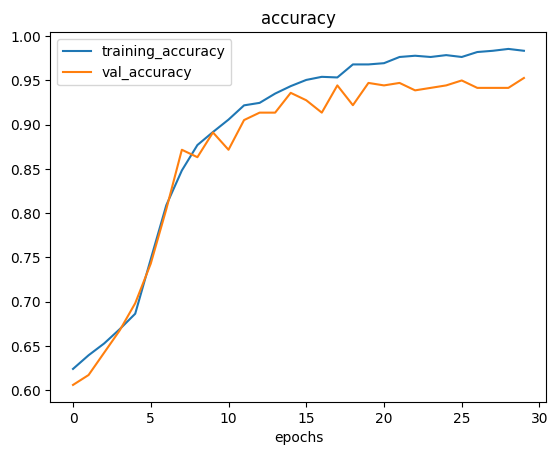

In [57]:
accuracy_plot(history)

**2. Loss Curve:**

In [58]:
def loss_plot(model):
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

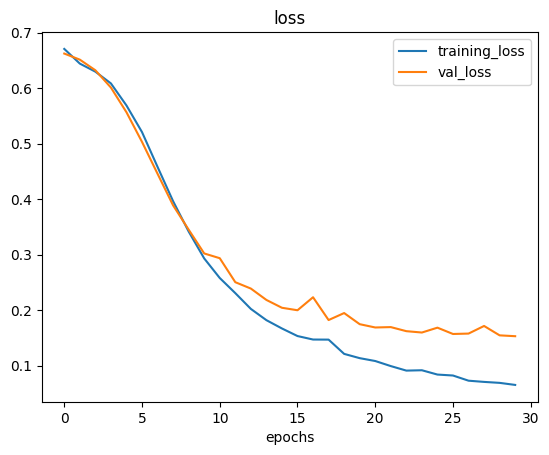

In [59]:
loss_plot(history)

# 6. Testing the model on custom data:

In [60]:
import time
import sys
def load(count=50, filler="=", delay=0.02):
  for i in range(count + 1):
    sys.stdout.write('\r')
    sys.stdout.write("[%s%s]" % (filler * i, ' ' * (count - i)))
    sys.stdout.flush()
    time.sleep(delay)

In [61]:
def userdef_tweet():
    custom_tweet = input("Enter a tweet: ")
    print()
    print("Your tweet is: ", custom_tweet)
    sentence = []
    sentence.append(custom_tweet)
    test_s = tokenizer.texts_to_sequences(sentence)
    test_p = pad_sequences(test_s, maxlen=max_length,
                      padding=pad_type, truncating=trunc_type)
    pred_value = model.predict(test_p)
    print("Predict Value is: ", pred_value)
    load(filler=">")
    print()
    if(pred_value>0.5):
        print("Potential Suicide Tweet")
    else:
        print("Not a suicide Tweet")

In [62]:
userdef_tweet()

Enter a tweet: At college, I learned super important knowledge, like uhh

Your tweet is:  At college, I learned super important knowledge, like uhh
1/1 [==============================] - 0s 111ms/step
Predict Value is:  [[0.06773389]]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]
Not a suicide Tweet


In [63]:
userdef_tweet()

Enter a tweet: I want to kill myself

Your tweet is:  I want to kill myself
1/1 [==============================] - 0s 25ms/step
Predict Value is:  [[0.87576586]]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]
Potential Suicide Tweet


In [64]:
userdef_tweet()

Enter a tweet: your order for a love life is running late by a few years

Your tweet is:  your order for a love life is running late by a few years
1/1 [==============================] - 0s 29ms/step
Predict Value is:  [[0.00271586]]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]
Not a suicide Tweet


In [65]:
userdef_tweet()

Enter a tweet: Enter a tweet: i just wanna die, everything sucks!

Your tweet is:  Enter a tweet: i just wanna die, everything sucks!
1/1 [==============================] - 0s 27ms/step
Predict Value is:  [[0.79135484]]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]
Potential Suicide Tweet


In [66]:
userdef_tweet()

Enter a tweet: A winner is a dreamer who never gives up

Your tweet is:  A winner is a dreamer who never gives up
1/1 [==============================] - 0s 28ms/step
Predict Value is:  [[0.03362401]]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]
Not a suicide Tweet
